# Lab Exercise: Classification and Resampling #
## Objectives ##
* Conduct LDA and logistic regression with resampling method.
* Evaluate model performance on a test set.
* Use cross-validation to select the best threshold for lostistic regression.

## Instruction ##
* **Please complete the code after the comment line with '###' (triple hashtags).**

## 1. Import Libraries and Generate an imbalanced Dataset. ##

In [1]:
pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 901.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00

In [2]:
# Do not modify the following code cell

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ISLP import confusion_table
from sklearn.datasets import make_classification
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from ISLP.models import (ModelSpec as MS, summarize, poly, sklearn_sm)
from sklearn.metrics import f1_score

# Generate a binary classification dataset with class imbalance
X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=1,
                           n_redundant=0,
                           class_sep=1.4,
                           n_clusters_per_class=1,
                           weights=[0.85, 0.15],  # 85% of one class, 15% of the other
                           random_state=2025)

# Convert to DataFrame for inspection
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(1, 3)])
df['target'] = y
print(df.head())
print("Class distribution in the dataset:")
print(df['target'].value_counts())

   feature_1  feature_2  target
0  -0.770144   0.409571       0
1   0.476825   1.861456       0
2   1.403934  -0.704547       1
3  -0.496027  -0.786168       0
4   1.793279   0.654765       1
Class distribution in the dataset:
target
0    847
1    153
Name: count, dtype: int64


## 2. Plot the scatter plot of the dataset, with different colors for the two classes ##
* You can use `sns.scatterplot` with `hue=y` to distinguish the two classes with different colors.

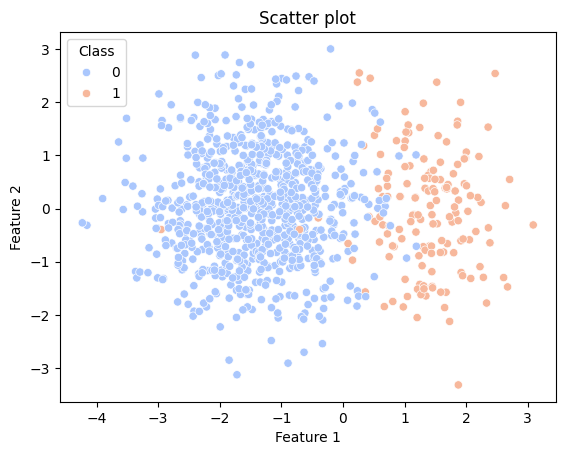

In [13]:
# Your code here:

### Please draw the scatter plot
# sns.scatterplot(x='feature_1', y='feature_2', hue=y, data=df)
# plt.show()
sns.scatterplot(x=df['feature_1'], y=df['feature_2'], hue=df['target'], palette='coolwarm')
plt.title('Scatter plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title="Class")
plt.show()


## 3: Split Data into Training and Testing Sets and fit LDA ##
* Split the dataset while preserving the imbalanced class distribution: you may use `train_test_split` with `stratify=y`. Set the proportion of testing sets to 0.2.

In [11]:
# Your code here:

### train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

* Fit LDA on the training set and report confusion matrix on the testing set.

In [14]:
# Your code here

### Create and train the LDA model on the training set
lda = LDA()
lda.fit(X_train, y_train)

### Make predictions on the testing set
y_pred = lda.predict(X_test)


### Generate the confusion matrix (contingency table) for the testing set
confusion_table(y_test, y_pred)


Truth,0,1
Predicted,,
0,164,5
1,1,30


# 4 (Bonus: 1 point): Fit logistic regression and conduct Cross-Validation to select the best threshold. #
* Please conduct a 10-fold stratified CV (on the entire dataset) to select the best threshold among `[0.1, 0.2,..., 0.9]`, use $F_1$-score (good for imbalanced data set: https://en.wikipedia.org/wiki/F-score) to evaluate the model performance.
Instead of using `train_test_split`, you can use `StratifiedKFold()` to create a stratified CV object.
* You can use `cross_validate` to conduct cross validation.
* `f1_score(pred_label, true_label)` gives the $F_1$-score.
* **Objective**: Return the threshold that returns the highest $F_1$-score.

In [8]:
# Your code here:

# set up the design matrix X
design = MS(df.drop(columns=['target'], inplace=False))
X_design = design.fit_transform(df.drop(columns=['target'], inplace=False))

### Initialize StratifiedKFold for 10-fold cross-validation, ensuring shuffling and a fixed random state for reproducibility (please complete the code).
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=2025)

### create the model object with sklearn_sm (please complete the code)
log_reg = sklearn_sm(sm.Logit)

In [9]:
# Your code here:

### Initialize a list of thresholds to test (please complete the code).
thresholds = np.arange(0.1, 1.0, 0.1)

# Initialize variables to store the best threshold and F1 score.
best_threshold = None
best_f1 = 0

# Iterate over each threshold in the thresholds list.
for threshold in thresholds:

    # define the custom_f1 with different threshold
    def custom_f1(model, X, y, thresh = threshold):
        y_pred_proba = model.predict(X)
        y_pred = (y_pred_proba >= thresh).astype(int)
        return f1_score(y, y_pred)

    ### please conduct cross validation with cross_validate()
    cv_results = cross_validate(log_reg, X_design, df['target'], cv=cv, scoring=custom_f1, return_train_score=False)

    f1 = np.mean(cv_results["test_score"])
    # Print the current threshold and its corresponding F1 score.
    print(f"Threshold: {threshold:.1f}, average F1-score: {f1:.4f}")
    # Check if the current F1 score is better than the best F1 score found so far.
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Print the best threshold and its corresponding F1 score.
print(f"Best threshold: {best_threshold}, Best F1-score: {best_f1:.4f}")
# Print a descriptive label for the confusion table.

Optimization terminated successfully.
         Current function value: 0.093087
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075723
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.092532
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080059
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.090760
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.093245
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086040
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083769
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086700
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.